# Análise Descritiva 
### Departamento de Policia e Segurança - Guaratingueta
                                                                           Bruno Bastos
                                                                           Matheus Olimpio
                                                                           
                                                                       
#### Introdução


#### 1. Análises
- Análise de ocorrências
    - _Análise de Homicídios_
    - _Análise de Lesões_
    - _Análise de Estupro_
    - _Análise de Roubos_
    - _Análise de Furtos_

- Análise de Departamento
    - _Análise do DP-01_
    - _Análise do DP-02_
    - _Análise do DP-03_
    
#### 2. Conclusão
    


## Análises

---
### Análise de Homicídios 
---

,Natureza,Sigla
0,Homicídio Doloso,HD
1,Homicídio Doloso Acidente de Transito,HDAT
2,Homicídio Culposo Acidente de Transito,HCAT
3,Homicídio Culposo Outros,HCO
4,Tentativa de Homicídio,TH


 ---------------------------------------------------------------
 Análise Geral de Homicidios 
 ---------------------------------------------------------------


,HD,HDAT,HCAT,HCO,TH
2017,20,0,14,0,39
2018,38,0,9,1,41
2019,5,0,3,8,8


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,HD,20,27.4
1,HDAT,0,0.0
2,HCAT,14,19.18
3,HCO,0,0.0
4,TH,39,53.42


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,HD,38,42.7
1,HDAT,0,0.0
2,HCAT,9,10.11
3,HCO,1,1.12
4,TH,41,46.07


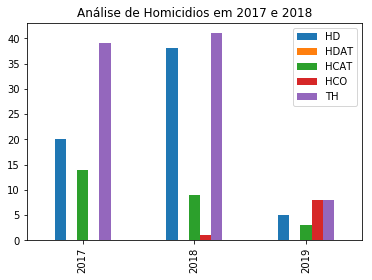

In [75]:
Facade.homicidios()

### Análise de Lesões Corporais
---

,Natureza,Sigla
0,Lesão Corporal Seguida de Morte,LCSM
1,Lesão Corporal Dolosa,LCD
2,Lesão Corporal Culposo Acidente de Transito,LCCAT
3,Lesão Corporal Culposo Outros,LCCO


 ---------------------------------------------------------------
 Análise Geral de Lesões 
 ---------------------------------------------------------------


,LCSM,LCD,LCCAT,LCCO
2017,0,219,329,8
2018,0,226,336,10
2019,0,68,43,17


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,LCSM,0,0.0
1,LCD,219,39.39
2,LCCAT,329,59.17
3,LCCO,8,1.44


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,LCSM,0,0.0
1,LCD,226,39.51
2,LCCAT,336,58.74
3,LCCO,10,1.75


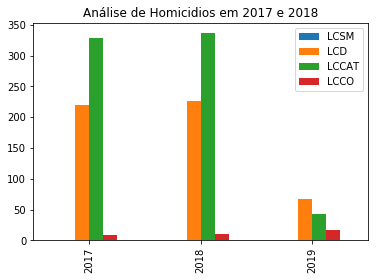

In [84]:
Facade.lesoes()

### Análise de Estupros
---

,Natureza,Sigla
0,Estupro,ES
1,Estupro de Vunerável,ESV


 ---------------------------------------------------------------
 Análise Geral de Estupros 
 ---------------------------------------------------------------


,ES,ESV
2017,16,22
2018,6,13


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,ES,16,42.11
1,ESV,22,57.89


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,ES,6,31.58
1,ESV,13,68.42


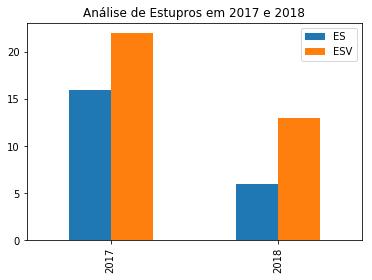

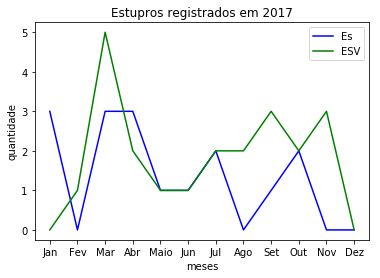

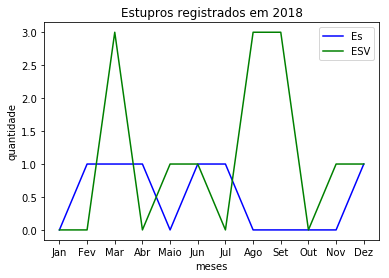

In [78]:
Facade.estupros()

### Análise de Roubos
---

,Natureza,Sigla
0,Roubo - Outros,RO
1,Roubo de Veiculos,RV
2,Roubo a Banco,RB
3,Roubo de Carga,RC


 ---------------------------------------------------------------
 Análise Geral de Roubos 
 ---------------------------------------------------------------


,RO,RV,RB,RC
2017,473,40,0,2
2018,324,58,0,6


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,RO,473,91.84
1,RV,40,7.77
2,RB,0,0.0
3,RC,2,0.39


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,RO,324,83.51
1,RV,58,14.95
2,RB,0,0.0
3,RC,6,1.55


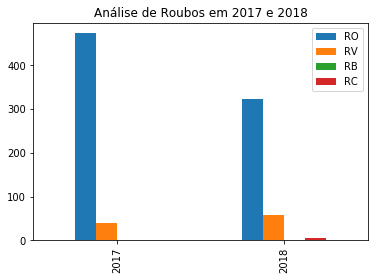

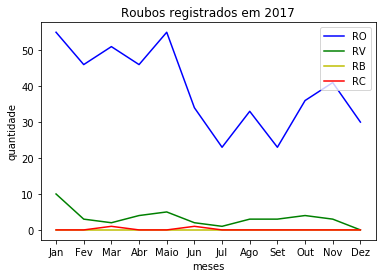

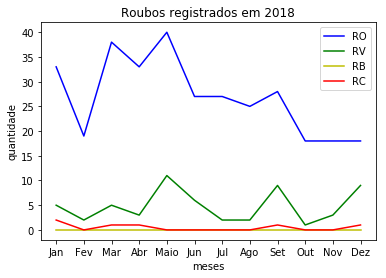

In [91]:
Facade.roubos()

### Análise de Furtos
---

 ---------------------------------------------------------------
 Análise Geral de Furtos 
 ---------------------------------------------------------------


,FO,FV
2017,1040,106
2018,917,68


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,FO,1040,90.75
1,FV,106,9.25


,Natureza,Frequencia Absoluta,Frequencia Relativa(%)
0,FO,917,93.1
1,FV,68,6.9


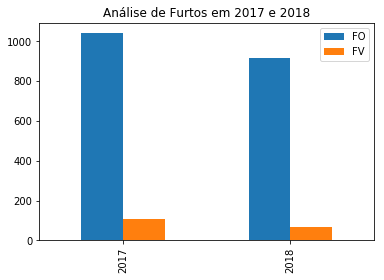

In [85]:
Facade.furtos()

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

%matplotlib inline

###########################################################
## Class Facade
## This class process the datas and build the graphs and tables || its a middleware
###########################################################
class Facade:
    

    @staticmethod
    def furtos():
        #Table.showFurtosSigla()
        a = Data.getFurtos('2017')
        b = Data.getFurtos('2018')

        
        Facade.mensagem('Análise Geral de Furtos')
        titulo = 'Análise de Furtos em 2017 e 2018'
        columns = ['FO','FV']
        index = ['2017','2018']
        Facade.graficoGeral([a,b], titulo, columns, index)
        Facade.estatistica(a, columns)
        Facade.estatistica(b, columns)
         
        
    @staticmethod
    def estupros():
        Table.showEstuprosSigla()
        
        a, a1 = Data.getEstupros('2017')
        b, b1 = Data.getEstupros('2018')
        
        columns = ['ES','ESV']
        index = ['2017','2018']
        titulo = 'Análise de Estupros em 2017 e 2018'
        
        Facade.mensagem('Análise Geral de Estupros') 
        Facade.graficoGeral([a,b], titulo, columns, index)
        Facade.estatistica(a, columns)
        Facade.estatistica(b, columns)
        Facade.graficoPorMes(a1, ['Es','ESV'],['-b','-g'] ,'Estupros registrados em 2017','meses', 'quantidade')
        Facade.graficoPorMes(b1, ['Es','ESV'],['-b','-g'] ,'Estupros registrados em 2018','meses', 'quantidade')

    @staticmethod
    def roubos():
        Table.showRoubosSigla()
        
        a, a1 = Data.getRoubos('2017')
        b, b1 = Data.getRoubos('2018')
        columns = ['RO','RV','RB','RC']
        index = ['2017','2018']
        titulo = 'Análise de Roubos em 2017 e 2018'
          
        Facade.mensagem('Análise Geral de Roubos')
        Facade.graficoGeral([a,b], titulo, columns, index)
        Facade.estatistica(a, columns)
        Facade.estatistica(b, columns)
        Facade.graficoPorMes(a1, columns,['-b','-g','-y','-r'] ,'Roubos registrados em 2017','meses', 'quantidade')
        Facade.graficoPorMes(b1, columns,['-b','-g','-y','-r'] ,'Roubos registrados em 2018','meses', 'quantidade')

    @staticmethod 
    def lesoes():
        Table.showLesoesSigla()
        
        a = Data.getLesoes('2017')
        b = Data.getLesoes('2018')
        c = Data.getLesoes('2019')
        titulo= 'Análise de Homicidios em 2017 e 2018'
        columns = ['LCSM','LCD','LCCAT','LCCO']
        index = ['2017','2018','2019']
        
        Facade.mensagem('Análise Geral de Lesões')
        Facade.graficoGeral([a,b,c], titulo, columns, index)
        Facade.estatistica(a, columns)
        Facade.estatistica(b, columns)
 
    @staticmethod
    def homicidios():
        Table.showHomicidiosSigla()

        a = Data.getHomicidios('2017')
        b = Data.getHomicidios('2018')
        c = Data.getHomicidios('2019')
        titulo = 'Análise de Homicidios em 2017 e 2018'
        index = ['2017','2018','2019']
        columns = ['HD','HDAT','HCAT','HCO','TH']
        
        Facade.mensagem('Análise Geral de Homicidios')
        Facade.graficoGeral([a,b,c], titulo, columns, index)
        Facade.estatistica(a, columns)
        Facade.estatistica(b, columns)
 
         
    
    ##################### UTILS

    @staticmethod
    def static(a):
        sa = sum(a)
        return [str(round(((a[x] * 100)/ sa), 2)) for x in range(len(a))]
        

    @staticmethod
    def graficoGeral(data, titulo,columns, index):
        fig, (ax) = plt.subplots(nrows = 1,ncols = 1)
        ax.set_title(titulo)
        df = pd.DataFrame(data, columns = columns, index = index)
        df.plot.bar(ax = ax)
        display(df)
    
    @staticmethod
    def estatistica(data, columns):
        ax = Facade.static(data)
        columns =  columns
        df = Table.create(['Natureza','Frequencia Absoluta','Frequencia Relativa(%)'],[columns, data, ax])
        display(df)

        
    @staticmethod
    def graficoPorMes(data, label, color,title, ylabel = None, xlabel = None):
        fig, (ax) = plt.subplots(nrows = 1,ncols = 1)
        meses = ['Jan','Fev','Mar','Abr','Maio','Jun','Jul','Ago','Set','Out','Nov','Dez']
        for i in range(len(data)):
            plt.plot(meses, data[i], color[i], label= label[i])
        plt.legend(loc = 'upper right')
        plt.xlabel(ylabel)
        plt.ylabel(xlabel)
        plt.title(title)
    
    @staticmethod
    def mensagem(mensagem):
        print(' ---------------------------------------------------------------')
        print(' {0} '. format(mensagem))
        print(' ---------------------------------------------------------------')
    
    
###########################################################
## This class call the CSV Files and convert to a matrix
###########################################################
class CsvI:
    
    @staticmethod
    def read(file):
        matrix = []
        
        with open(file, encoding="utf8") as csvFile:
            reader = csv.reader(csvFile)
            for row in reader:
                matrix.append(row)
            csvFile.close()
        
        return matrix
###########################################################
## This class build tables
###########################################################
class Table:

    @staticmethod
    def create(titles, values):
        dic = {}
        for i in range(len(titles)):
            dic[titles[i]] = values[i]
        df = pd.DataFrame(dic)
        return df
    
    @staticmethod
    def showHomicidiosSigla():
        display(Table.create(['Natureza', 'Sigla'], 
                            [
                                ['Homicídio Doloso',
                                 'Homicídio Doloso Acidente de Transito',
                                 'Homicídio Culposo Acidente de Transito',
                                 'Homicídio Culposo Outros',
                                'Tentativa de Homicídio'],
                                ['HD','HDAT','HCAT','HCO','TH']
                            ]
                            ))
    
    def formatLines(matrix, aux = None):
        dic = []
        for l in range(len(matrix[0])):
            dic.append([])
            if aux is not None:
                dic[l].append(aux[l])
            for j in range(len(matrix)):
                dic[l].append(matrix[j][l])
        return dic
                
    @staticmethod
    def showEstuprosSigla():
        display(Table.create(['Natureza','Sigla'],
                            [
                                ['Estupro','Estupro de Vunerável'],
                                ['ES','ESV']
                            ]
                            ))
    @staticmethod
    def showRoubosSigla():
        display(Table.create(['Natureza','Sigla'],
                            [
                                ['Roubo - Outros','Roubo de Veiculos','Roubo a Banco','Roubo de Carga'],
                                ['RO', 'RV','RB','RC']
                            ]
                            ))
    @staticmethod
    def showLesoesSigla():
        display(Table.create(['Natureza', 'Sigla'], 
                            [
                                ['Lesão Corporal Seguida de Morte',
                                 'Lesão Corporal Dolosa',
                                 'Lesão Corporal Culposo Acidente de Transito',
                                 'Lesão Corporal Culposo Outros'],
                                ['LCSM','LCD','LCCAT','LCCO']
                            ]
                            ))
    
    
###########################################################
## This class process the datas
###########################################################
class Data:

    @staticmethod 
    def getHomicidios(year):
        return Data.source([1,3,5,6,7],year)

    @staticmethod 
    def getLesoes(year):
        return Data.source([8,9,10,11],year)

    @staticmethod 
    def getEstupros(year):
        return [Data.source([15, 16],year), Data.sourceMensal([15,16], year)]
    @staticmethod 
    def getRoubos(year):
        return [Data.source([18, 19, 20, 21],year), Data.sourceMensal([18, 19, 20, 21],year) ]
    
    @staticmethod
    def getFurtos(year):
        return Data.source([22,23],year)
    
    @staticmethod
    def source(lines, year):
        dic = []
        for l in range(len(lines)):
            dic.append([])
            dic[l] = 0
            for d in range(len(DPS)):
                dic[l] += int(DPS[d]['{0}M'.format(year)][lines[l]][13])
            
        return dic

    @staticmethod
    def sourceMensal(lines, year):
        dic = []
        
        for l in range(len(lines)):
            dic.append([])
            for m in range(1, 13):
                dic[l].append([])
                dic[l][m-1] = 0
                for d in range(len(DPS)):
                    dic[l][m-1] += int(DPS[d]['{0}M'.format(year)][lines[l]][m])
        return dic
        
    
                   
        
    
DP01 = {
    '2017': CsvI.read('./data/DP012017.csv'),
    '2017M': CsvI.read('./data2/DP012017.csv'),
    '2018' : CsvI.read('./data/DP012018.csv'),
    '2018M' : CsvI.read('./data2/DP012018.csv'),
    '2019' : CsvI.read('./data/DP012019.csv'),
    '2019M' : CsvI.read('./data2/DP012019.csv')
}
DP02 = {
    '2017': CsvI.read('./data/DP022017.csv'),
    '2017M':CsvI.read('./data2/DP022017.csv'),
    '2018' : CsvI.read('./data/DP022018.csv'),
    '2018M': CsvI.read('./data2/DP022018.csv'),
    '2019' : CsvI.read('./data/DP022019.csv'),
    '2019M':CsvI.read('./data/DP022019.csv'),
}
DP03= {
    '2017': CsvI.read('./data/DP032017.csv'),
    '2017M': CsvI.read('./data2/DP032017.csv'),
    '2018' : CsvI.read('./data/DP032018.csv'),
    '2018M' : CsvI.read('./data2/DP032018.csv'),
    '2019' : CsvI.read('./data/DP032019.csv'),
    '2019M' : CsvI.read('./data2/DP032019.csv')
}

DPS = [DP01, DP02, DP03]


In [15]:
    @staticmethod    
    def homicidiosEstatistica():

        #static
        a = Data.getHomicidios('2017')
        b = Data.getHomicidios('2018')
        ax = Facade.static(a)
        columns = ['HD','HDAT','HCAT','HCO','TH']
        Facade.drawGraph('pie', columns, ax, ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffea23'],(0.05,0.05,0.05,0.05,0.05), 'Gráfico de Homicídios 2017')
        df = Table.create(['Natureza','Frequencia Absoluta','Frequencia Relativa(%)'],[columns, a, ax])
        display(df)
        
        ax = Facade.static(b)
        columns = ['HD','HDAT','HCAT','HCO','TH']
        Facade.drawGraph('pie', columns, ax, ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffea23'],(0.05,0.05,0.05,0.05,0.05), 'Gráfico de Homicídios 2018')
        df = Table.create(['Natureza','Frequencia Absoluta','Frequencia Relativa(%)'],[columns, b, ax])
        display(df)

[[0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1], [0, 0, 3, 0, 1, 1, 0, 3, 3, 0, 1, 1]]
